In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#load the csv file
df = pd.read_csv(r"C:\Users\chand\Downloads\sales_data.csv")
df

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Unnamed: 14,product_name
0,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,NaN,NaN
1,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,NaN,NaN
2,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,NaN,NaN
3,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,NaN,NaN
4,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,15-04-2023,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie,NaN,NaN
996,1067,07-09-2023,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob,NaN,NaN
997,1018,27-04-2023,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David,NaN,NaN
998,1100,20-12-2023,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David,NaN,NaN


In [2]:
df.head(8)
print(df.shape)
df.info()

(1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
 14  Unnamed: 14           0 non-null      float64
 15  product_nam

In [3]:
# checking the duplicate data and Drop duplicates
print(df.duplicated())
df.drop_duplicates(inplace=True)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [4]:
#chekcs the dtatatype and null values
#df.info()
df.isnull().sum()

Product_ID                 0
Sale_Date                  0
Sales_Rep                  0
Region                     0
Sales_Amount               0
Quantity_Sold              0
Product_Category           0
Unit_Cost                  0
Unit_Price                 0
Customer_Type              0
Discount                   0
Payment_Method             0
Sales_Channel              0
Region_and_Sales_Rep       0
Unnamed: 14             1000
product_name            1000
dtype: int64

In [5]:
#drop the unwanted columns with null values
df.drop(["Unnamed: 14","product_name"],axis=1,inplace=True)
#df.info()

In [6]:
#checks the data type
#df["Unit_Price"].dtype
#to change the data 
#df["Unit_Price"]=df["Unit_Price"].astype(int)

In [7]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [8]:
# Rename column
df.rename(columns={'Sale_Date': 'Sale_Date_New'}, inplace=True)

# Converting date object to datetime 
#print(df['Sale_Date_New'].dtype)
df['Sale_Date_New'] = pd.to_datetime(df['Sale_Date_New'], errors='coerce')

# Extracted month and  year from sale_Date_new

df['Month'] = df['Sale_Date_New'].dt.month
df['Year'] = df['Sale_Date_New'].dt.year


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date_New         379 non-null    datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [10]:
#EXPLORATORY DATA ANALYSIS

In [11]:
df['Profit_Per_Unit'] = df['Unit_Price'] - df['Unit_Cost']
df['Total_Cost'] = df['Unit_Cost'] * df['Quantity_Sold']
df['Profit'] = df['Sales_Amount'] - df['Total_Cost']

# Create Revenue, Cost, Profit
#df['Revenue'] = df['Quantity_Sold'] * df['Unit_Price']
#df['Cost'] = df['Quantity_Sold'] * df['Unit_Cost']
#df['Profit'] = df['Revenue'] - df['Cost']

total_sales=df['Sales_Amount'].sum()
total_profit=df['Profit'].sum()
total_qty = df['Quantity_Sold'].sum()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Total Quantity Sold:", total_qty)

Total Sales: 5019265.2299999995
Total Profit: -58822828.41
Total Quantity Sold: 25355


In [12]:
# Sales by Region
RegionWise_Sales=df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)
print(RegionWise_Sales)

Region
North    1369612.51
East     1259792.93
West     1235608.93
South    1154250.86
Name: Sales_Amount, dtype: float64


In [13]:
df.columns

Index(['Product_ID', 'Sale_Date_New', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep', 'Month', 'Year', 'Profit_Per_Unit',
       'Total_Cost', 'Profit'],
      dtype='object')

In [14]:
#Top performer of sales_rep
sales_Repre=df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)
print(sales_Repre)

Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64


In [15]:
monthly_Sales =df.groupby('Month')['Sales_Amount'].sum()
print(monthly_Sales)

Month
1.0     170311.25
2.0     145200.18
3.0     179857.17
4.0     141896.80
5.0     133039.23
6.0     115051.25
7.0     170739.06
8.0     183617.33
9.0     149510.72
10.0    142976.82
11.0    160565.59
12.0    187974.98
Name: Sales_Amount, dtype: float64


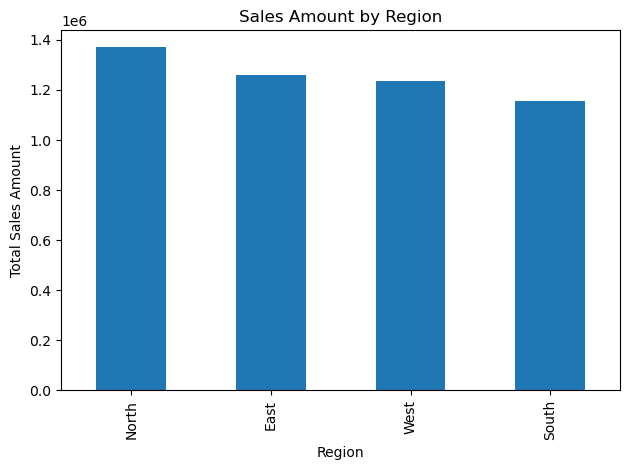

In [16]:
#Region wie sales visualisation
#North has more sales_Amount
plt.figure()
df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Sales Amount by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()


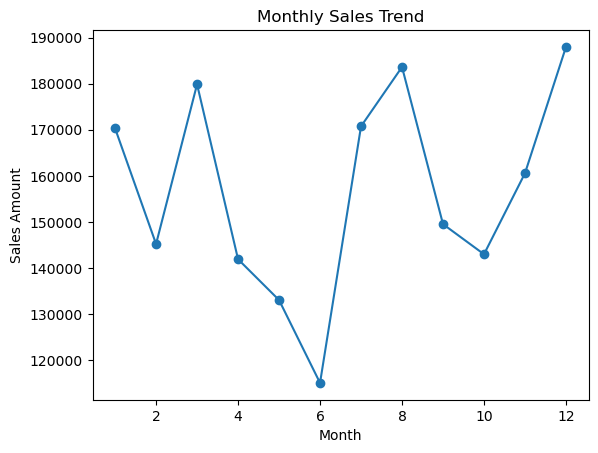

In [17]:
#mostly sale in a month  is 12
df.groupby('Month')['Sales_Amount'].sum().plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.show()


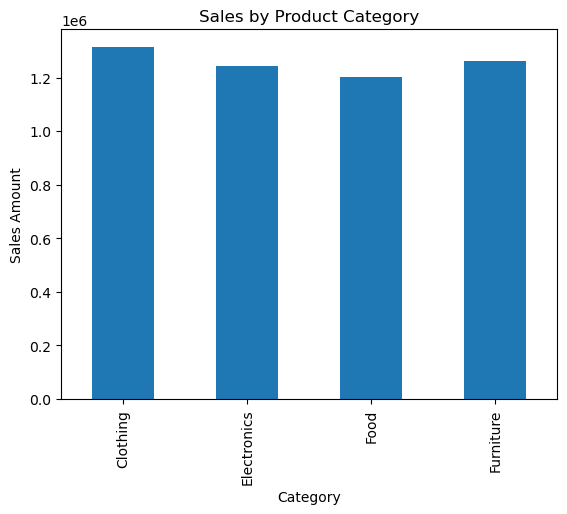

In [18]:
#product category which is sales mostly is clothing
df.groupby('Product_Category')['Sales_Amount'].sum().plot(kind='bar')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales Amount")
plt.show()


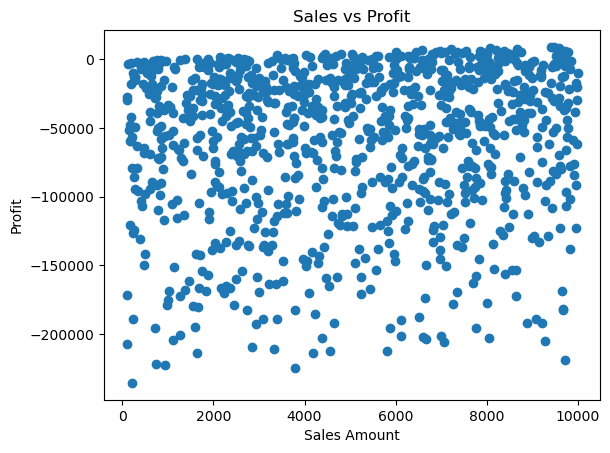

In [19]:

plt.scatter(df['Sales_Amount'], df['Profit'])
plt.title("Sales vs Profit")
plt.xlabel("Sales Amount")
plt.ylabel("Profit")
plt.show()


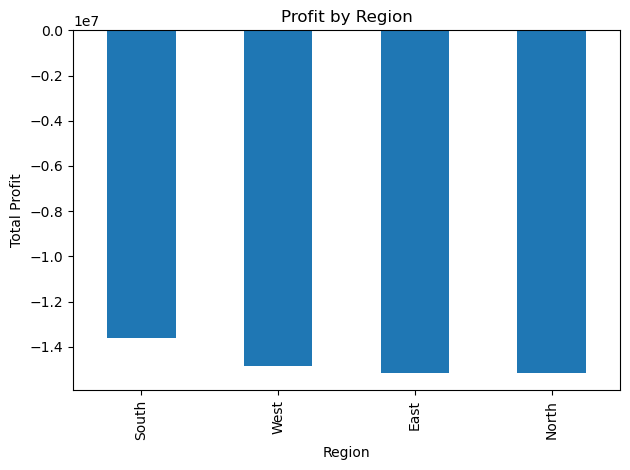

In [23]:
# Profit by Region
plt.figure()
df.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

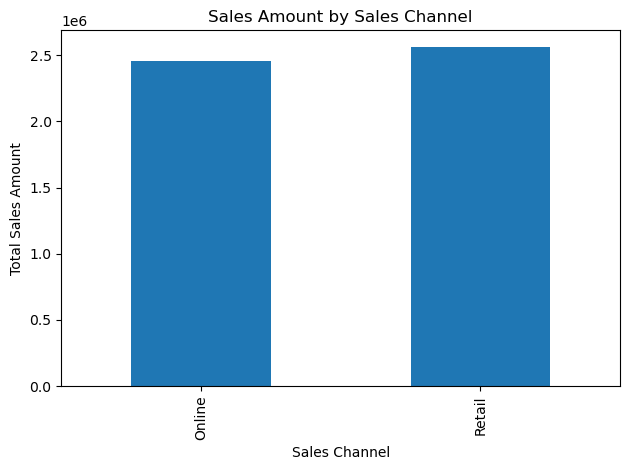

In [21]:
# Sales by Sales Channel
plt.figure()
df.groupby('Sales_Channel')['Sales_Amount'].sum().plot(kind='bar')
plt.title("Sales Amount by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Quantity_sold')

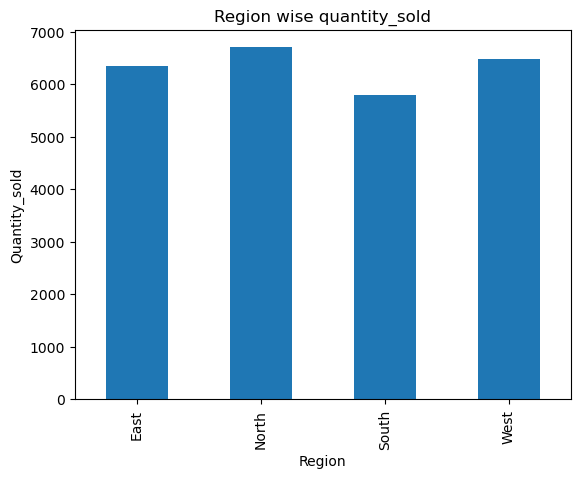

In [22]:
#whuich region more number of quantity sold
plt.figure()
df.groupby('Region')['Quantity_Sold'].sum().plot(kind='bar')
plt.title('Region wise quantity_sold')
plt.ylabel('Quantity_sold')
